In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import matplotlib.cm as cm
import seaborn as sns

In [9]:
curry_df = pd.read_csv("/Users/Owen Hom/Documents/data/archive/3_stephen_curry_shot_chart_2023.csv")

curry_df['shot_type'] = curry_df['shot_type'].replace({2: '2-point shot', 3: '3-point shot'})

curry_df['result'] = curry_df['result'].replace({True: 'Made', False: 'Missed'})

print(curry_df.head())

   top  left          date      qtr time_remaining  result     shot_type  \
0   63   300  Oct 18, 2022  1st Qtr           7:27  Missed  2-point shot   
1  133   389  Oct 18, 2022  1st Qtr           7:22    Made  2-point shot   
2  326   247  Oct 18, 2022  1st Qtr           7:11  Missed  3-point shot   
3  249    89  Oct 18, 2022  1st Qtr           5:16  Missed  3-point shot   
4  282   158  Oct 18, 2022  1st Qtr           3:52  Missed  3-point shot   

   distance_ft  lead  lebron_team_score  opponent_team_score opponent team  \
0            6  True                  9                    6      LAL  GSW   
1           17  True                 11                    6      LAL  GSW   
2           27  True                 11                    6      LAL  GSW   
3           25  True                 19                   13      LAL  GSW   
4           24  True                 22                   17      LAL  GSW   

   season  color  
0    2023    red  
1    2023  green  
2    2023    red 

C:\Users\Owen Hom\AppData\Local\Temp\ipykernel_14356\3263434491.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='shot_type', data=curry_df, palette='viridis')


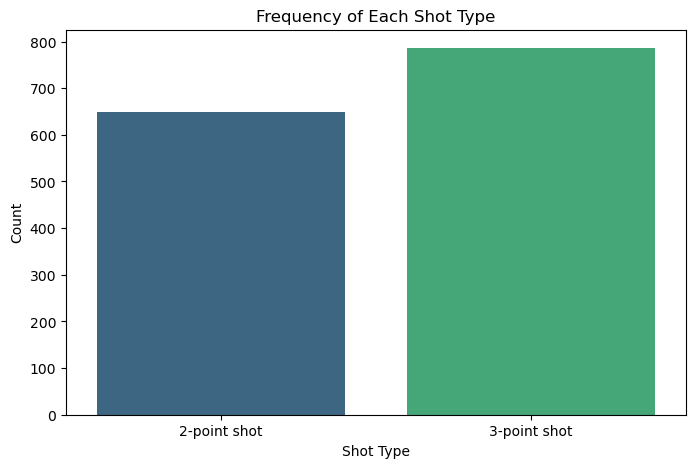

In [10]:
# Bar Chart 1: Frequency of Each Shot Type
plt.figure(figsize=(8,5))
sns.countplot(x='shot_type', data=curry_df, palette='viridis')
plt.title("Frequency of Each Shot Type")
plt.xlabel("Shot Type")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='shot_type'>

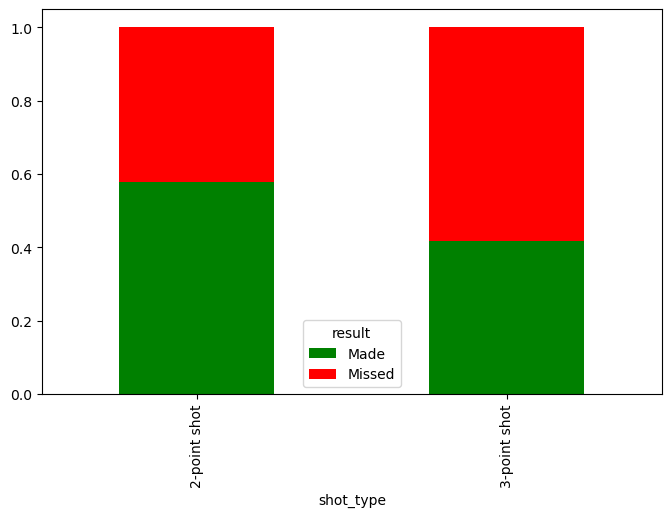

In [11]:
# Bar Chart 2: Shooting Accuracy by Shot Type

# Group by shot_type and result, calculate percentage
accuracy_by_type = curry_df.groupby('shot_type')['result'].value_counts(normalize=True).unstack().fillna(0)

# Plot as grouped bar chart
accuracy_by_type[['Made', 'Missed']].plot(kind='bar',
                                          stacked=True,
                                          color=['green', 'red'],
                                          figsize=(8,5))